In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('titanic (2).csv')

In [64]:
# Drop the column
df = df.drop('Cabin', axis=1)
# Drop rows with missing values
df = df.dropna()

In [65]:
# Encode the 'Sex' column using one-hot encoding
df = pd.get_dummies(df, columns=['Sex'])

In [66]:
df = df.drop('Name', axis=1)

In [67]:
# Encode the 'Ticket' column using Label Encoding
le = LabelEncoder()
df['Ticket'] = le.fit_transform(df['Ticket'])

In [68]:
# Encode the 'Embarked' column using Label Encoding
df['Embarked'] = le.fit_transform(df['Embarked'])

In [69]:
# Explore the data
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass   Age  SibSp  Parch  Ticket     Fare  \
0            1         0       3  22.0      1      0     407   7.2500   
1            2         1       1  38.0      1      0     470  71.2833   
2            3         1       3  26.0      0      0     531   7.9250   
3            4         1       1  35.0      1      0      39  53.1000   
4            5         0       3  35.0      0      0     372   8.0500   

   Embarked  Sex_female  Sex_male  
0         2       False      True  
1         0        True     False  
2         2        True     False  
3         2        True     False  
4         2       False      True  
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    f

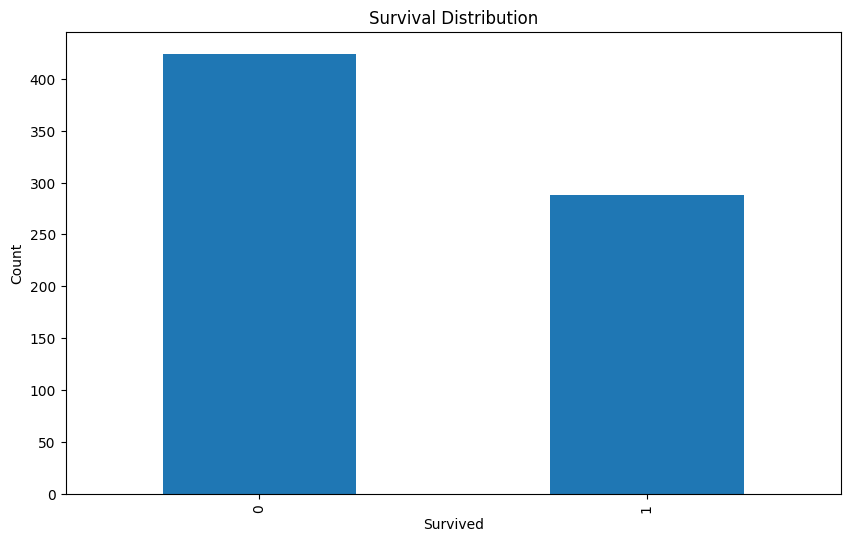

In [70]:
# Visualize the data balance
plt.figure(figsize=(10, 6))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

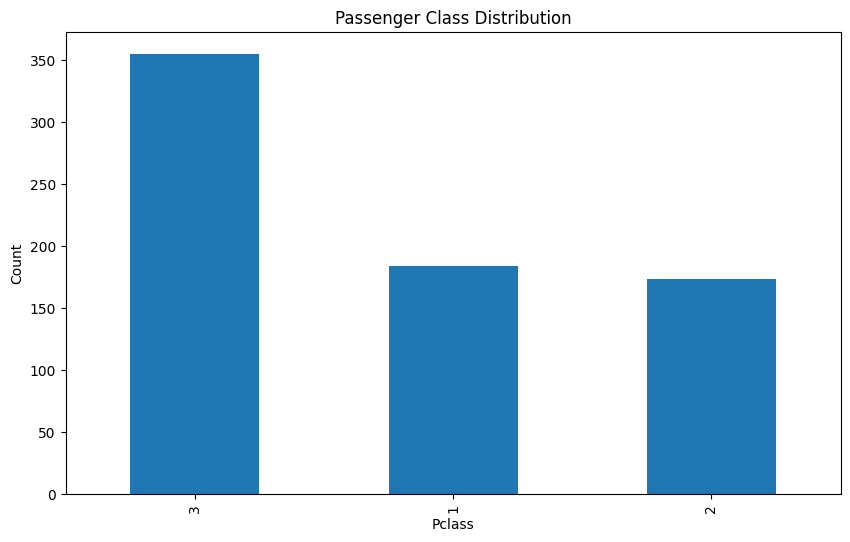

In [71]:
plt.figure(figsize=(10, 6))
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [72]:
# Split the data into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
# Evaluate the model on the training data
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 0.79


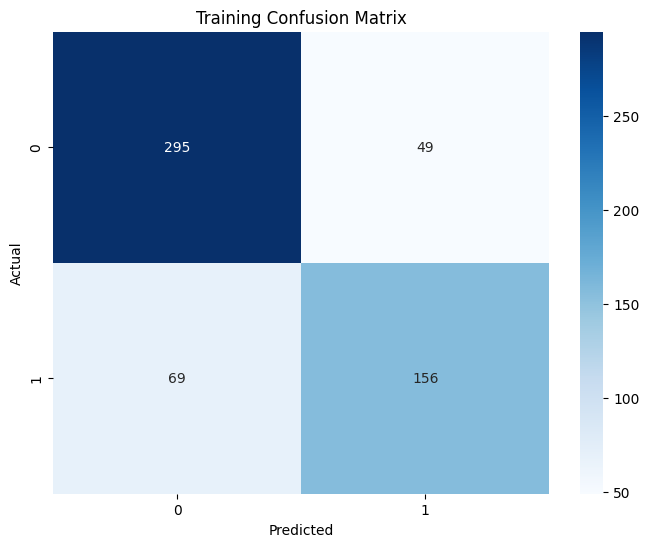

In [75]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, train_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

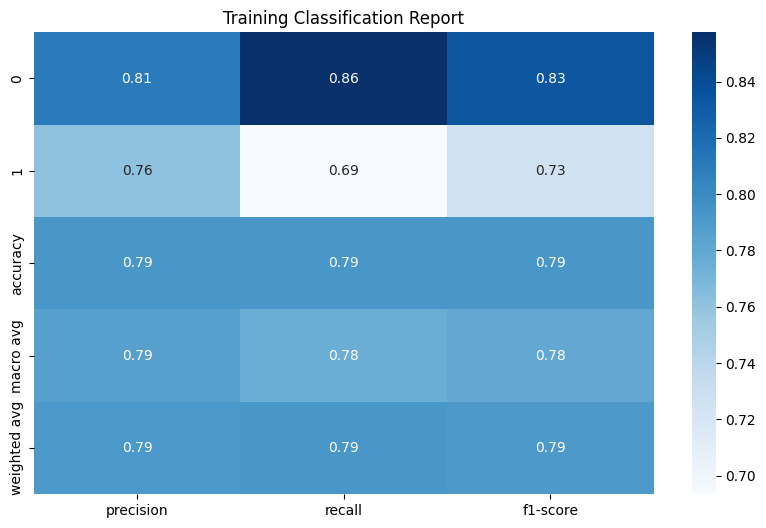

In [76]:
# Plot the classification report
plt.figure(figsize=(10, 6))
report = classification_report(y_train, train_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Training Classification Report')
plt.show()

In [77]:
# Evaluate the model on the testing data
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

Testing Accuracy: 0.80


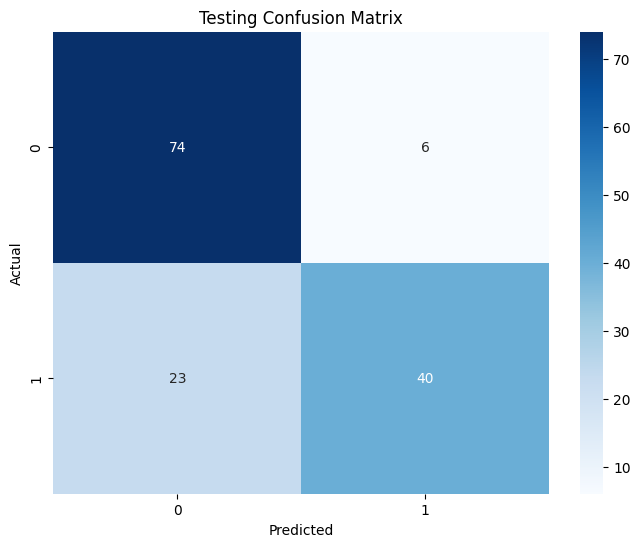

In [78]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

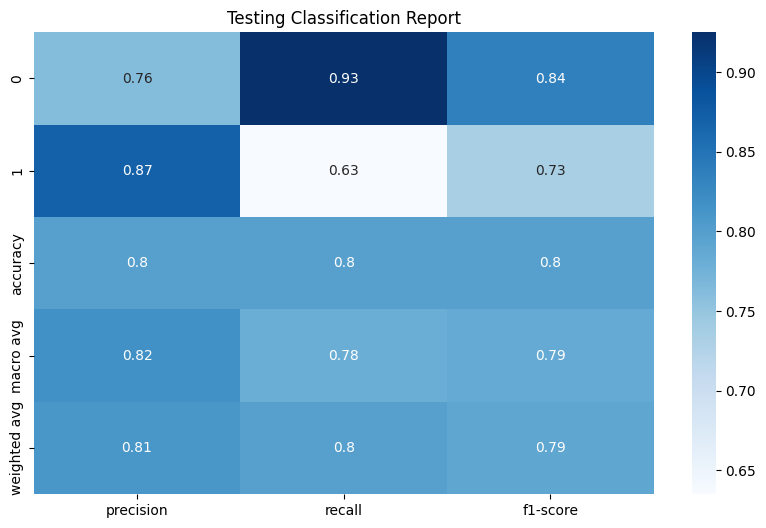

In [79]:
# Plot the classification report
plt.figure(figsize=(10, 6))
report = classification_report(y_test, test_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Testing Classification Report')
plt.show()

In [80]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.79
Testing Accuracy: 0.80
